<a href="https://colab.research.google.com/github/samservo09/bioinformatics-bipolar-drug-discovery/blob/main/5-model-comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bioinformatics: Drug discovery on Norepinephrine transporter protein

# Import libraries

In [30]:
! pip install -q lazypredict

In [31]:
! pip install --upgrade -q lazypredict

In [33]:
import lazypredict
import os

# Get the path to the `lazypredict` module
lazypredict_path = os.path.dirname(lazypredict.__file__)
print(lazypredict_path)

/usr/local/lib/python3.10/dist-packages/lazypredict


In [34]:
supervised_file_path = os.path.join(lazypredict_path, "Supervised.py")

# Read the original file
with open(supervised_file_path, "r") as file:
    filedata = file.read()

# Replace "sparse=False" with "sparse_output=False"
new_data = filedata.replace("sparse=False", "sparse_output=False")

# Write the modified file back
with open(supervised_file_path, "w") as file:
    file.write(new_data)

print("Modification complete.")

Modification complete.


In [35]:
# Display the relevant lines to confirm the change
!grep "OneHotEncoder" $supervised_file_path

from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
        ("encoding", OneHotEncoder(handle_unknown="ignore", sparse_output=False)),


In [36]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor

## Load the dataset

In [37]:
! wget https://raw.githubusercontent.com/samservo09/bioinformatics-bipolar-drug-discovery/refs/heads/main/data/CaMKK2_bioactivity_data_3class_pIC50_pubchem_fp.csv

--2024-10-13 02:47:13--  https://raw.githubusercontent.com/samservo09/bioinformatics-bipolar-drug-discovery/refs/heads/main/data/CaMKK2_bioactivity_data_3class_pIC50_pubchem_fp.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 247886 (242K) [text/plain]
Saving to: ‘CaMKK2_bioactivity_data_3class_pIC50_pubchem_fp.csv.2’

CaMKK2_bioactivity_ 100%[===================>] 242.08K  --.-KB/s    in 0.05s   

2024-10-13 02:47:13 (5.07 MB/s) - ‘CaMKK2_bioactivity_data_3class_pIC50_pubchem_fp.csv.2’ saved [247886/247886]



In [38]:
df = pd.read_csv('CaMKK2_bioactivity_data_3class_pIC50_pubchem_fp.csv')

In [40]:
X = df.drop('pIC50', axis=1)
Y = df.pIC50

## Data pre-processing

In [41]:
# check the X dimension
X.shape

(133, 881)

In [42]:
# remove low variance features
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
X = selection.fit_transform(X)
X.shape

(133, 86)

In [44]:
# perform data splitting using 80/20 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## Compare ML algorithms

In [49]:
# defines and builds the lazyclassifier
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

100%|██████████| 42/42 [00:09<00:00,  4.65it/s]


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000077 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 258
[LightGBM] [Info] Number of data points in the train set: 106, number of used features: 86
[LightGBM] [Info] Start training from score 6.828491
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

100%|██████████| 42/42 [00:08<00:00,  4.90it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000098 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 258
[LightGBM] [Info] Number of data points in the train set: 106, number of used features: 86
[LightGBM] [Info] Start training from score 6.828491
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

In [56]:
# performance table of the training set (80% subset)
predictions_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
ExtraTreesRegressor,-0.47,0.73,0.56,0.29
DecisionTreeRegressor,-0.47,0.73,0.56,0.02
ExtraTreeRegressor,-0.47,0.73,0.56,0.02
GaussianProcessRegressor,-0.47,0.73,0.56,0.03
XGBRegressor,-0.47,0.73,0.56,0.08
GradientBoostingRegressor,-0.68,0.70,0.60,0.23
RandomForestRegressor,-0.82,0.67,0.62,0.25
MLPRegressor,-0.96,0.65,0.65,0.26
BaggingRegressor,-1.01,0.64,0.65,0.07


In [52]:
# performance table of the test set (20% subset)
predictions_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
Lars,17885348007919084152497825464188928.00,-41273880018274809582687289532743680.00,211911390189535648.00,0.08
KernelRidge,18.08,-38.41,6.55,0.02
GaussianProcessRegressor,11.50,-23.23,5.13,0.02
PassiveAggressiveRegressor,1.89,-1.06,1.50,0.02
RANSACRegressor,1.85,-0.97,1.46,0.64
LinearRegression,1.84,-0.93,1.45,0.04
TransformedTargetRegressor,1.84,-0.93,1.45,0.03
LinearSVR,1.79,-0.83,1.41,0.06
Ridge,1.76,-0.76,1.39,0.04


## Data Visualization of model performance

[(0.0, 1.0)]

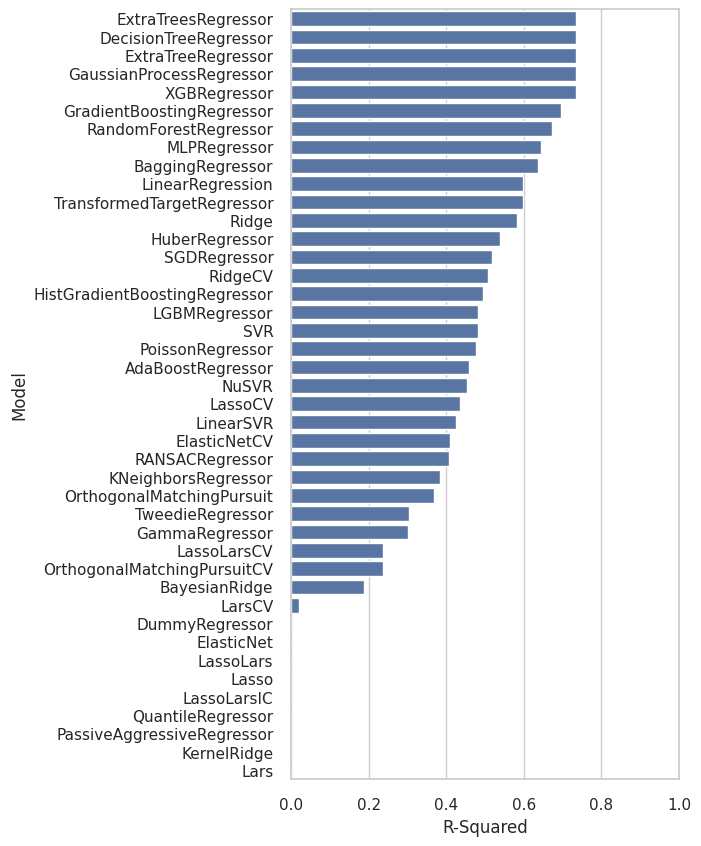

In [53]:
# bar plot of R-squared values
import matplotlib.pyplot as plt
import seaborn as sns

# train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="R-Squared", data=predictions_train)
ax.set(xlim=(0, 1))

[(0.0, 10.0)]

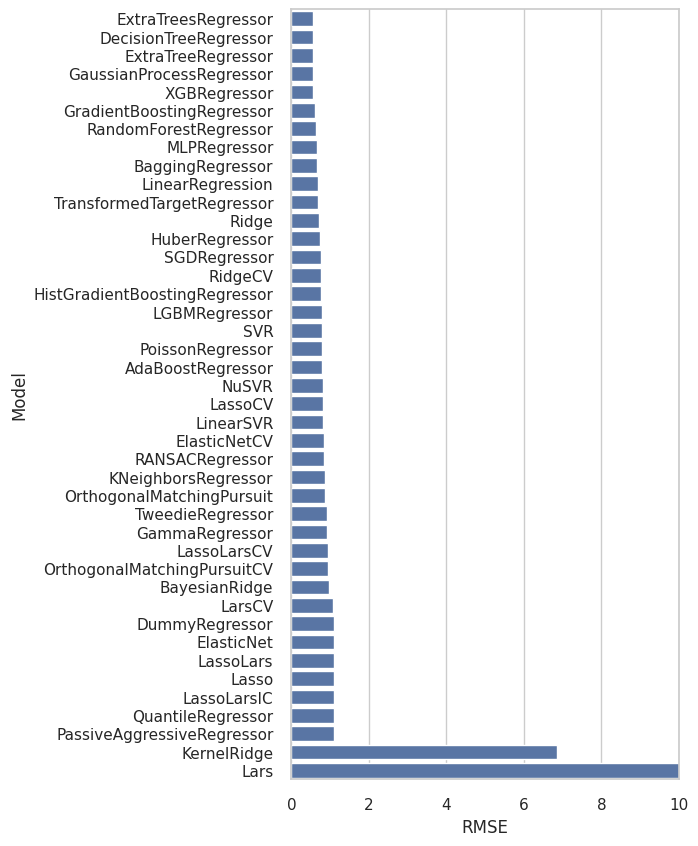

In [54]:
# bar plot of RMSE values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="RMSE", data=predictions_train)
ax.set(xlim=(0, 10))

[(0.0, 10.0)]

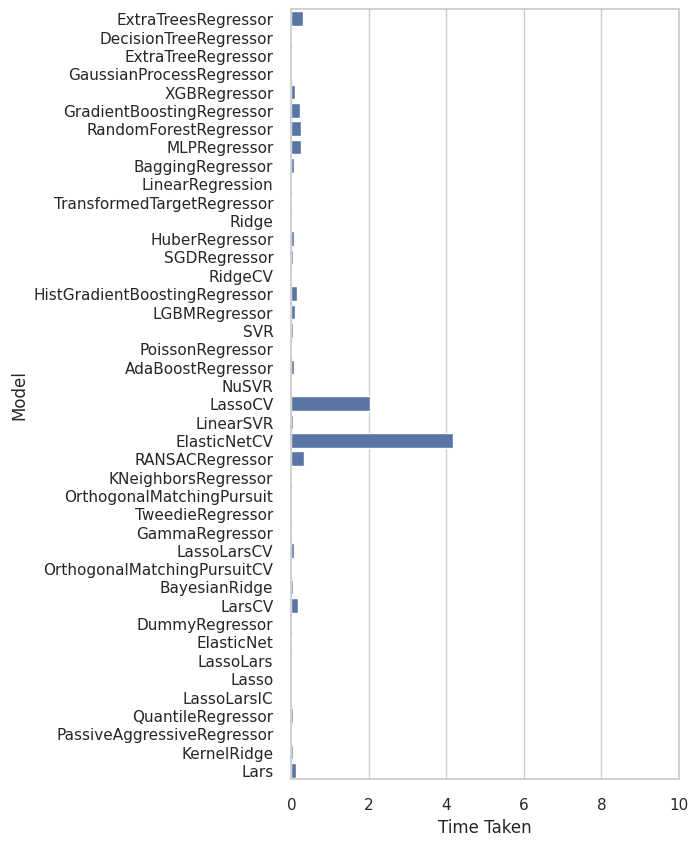

In [55]:
# bar plot of calculation time
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="Time Taken", data=predictions_train)
ax.set(xlim=(0, 10))

## Hyperparameter Tuning of Random Forest Regressor

In [58]:
!pip install -q pycaret

import pandas as pd
from pycaret.regression import *

# Setup PyCaret
reg = setup(data=df,
            target='pIC50',
            session_id=123,
            normalize=True,
            transformation=True,
            remove_multicollinearity=True,
            multicollinearity_threshold=0.95)

# Create a Random Forest Regressor model
rf_model = create_model('rf')

# Tune the hyperparameters
tuned_rf_model = tune_model(rf_model)

# Evaluate the tuned model
evaluate_model(tuned_rf_model)

# (Optional) Save the tuned model
save_model(tuned_rf_model, 'tuned_rf_model')

,Description,Value
0,Session id,123
1,Target,pIC50
2,Target type,Regression
3,Original data shape,"(133, 882)"
4,Transformed data shape,"(133, 709)"
5,Transformed train set shape,"(93, 709)"
6,Transformed test set shape,"(40, 709)"
7,Numeric features,881
8,Preprocess,True
9,Imputation type,simple


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.7765,0.7978,0.8932,0.1967,0.1181,0.1213
1,0.6007,0.6418,0.8011,0.2816,0.1013,0.0857
2,1.1663,3.1764,1.7822,-0.5869,0.2143,0.1573
3,0.7175,0.8526,0.9233,0.0566,0.1269,0.1207
4,1.0609,2.1725,1.4739,-2.4390,0.1968,0.1874
5,1.0409,1.5075,1.2278,-0.3170,0.1686,0.1647
6,1.0544,1.4372,1.1988,0.0300,0.1658,0.1767
7,1.1324,1.5974,1.2639,-0.6359,0.1658,0.1819
8,0.9244,1.1394,1.0674,-0.2529,0.1328,0.1269


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.7706,0.8990,0.9482,0.0948,0.1223,0.1157
1,0.7603,0.8508,0.9224,0.0476,0.1196,0.1122
2,1.1883,2.4723,1.5724,-0.2352,0.1843,0.1577
3,0.8334,0.8652,0.9301,0.0427,0.1248,0.1290
4,0.8269,1.0572,1.0282,-0.6735,0.1466,0.1493
5,0.8262,1.0433,1.0214,0.0885,0.1418,0.1316
6,1.1085,1.5406,1.2412,-0.0398,0.1749,0.1925
7,0.9693,1.0123,1.0061,-0.0367,0.1335,0.1534
8,0.8408,1.0487,1.0240,-0.1531,0.1251,0.1163


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['PubchemFP0', 'PubchemFP1',
                                              'PubchemFP2', 'PubchemFP3',
                                              'PubchemFP4', 'PubchemFP5',
                                              'PubchemFP6', 'PubchemFP7',
                                              'PubchemFP8', 'PubchemFP9',
                                              'PubchemFP10', 'PubchemFP11',
                                              'PubchemFP12', 'PubchemFP13',
                                              'PubchemFP14', 'PubchemFP15',
                                              'PubchemFP16', 'PubchemFP17',
                                              'PubchemFP18',...
                  TransformerWrapper(transformer=PowerTransformer(standardize=False))),
                 ('normalize', TransformerWrapper(transformer=StandardScaler())),
             

## Conclusion